In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# If you haven't already downloaded the 2001 data from http://www.transtats.bts.gov/Fields.asp?Table_ID=236 and
# unzipped it inside ./data, do this now.

# Load the data.
df_2001 = pd.read_csv('./data/2001.csv')

In [3]:
# What does the data look like?
df_2001.describe()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,5967780,5967780.000000,5967780.000000,5967780.000000,5736582.000000,5967780.000000,5723673.000000,5967780.000000,5967780.000000,5723673.000000,...,5967780.000000,5967780.000000,5967780.000000,0,5967780.000000,0,0,0,0,0
mean,2001,6.306294,15.683204,3.940373,1348.704605,1342.049714,1489.808760,1498.777263,1327.271572,125.033909,...,6.120620,14.830219,0.038741,NaN,0.002163,NaN,NaN,NaN,NaN,NaN
std,0,3.371688,8.775346,1.992345,482.686013,472.800211,511.180469,495.438313,1168.361491,70.703978,...,4.798693,10.307614,0.192977,NaN,0.046459,NaN,NaN,NaN,NaN,NaN
min,2001,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-719.000000,...,0.000000,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
25%,2001,3.000000,8.000000,2.000000,930.000000,928.000000,1110.000000,1115.000000,472.000000,72.000000,...,3.000000,9.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
50%,2001,6.000000,16.000000,4.000000,1333.000000,1330.000000,1522.000000,1525.000000,1049.000000,106.000000,...,5.000000,13.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
75%,2001,9.000000,23.000000,6.000000,1740.000000,1730.000000,1920.000000,1919.000000,1804.000000,158.000000,...,7.000000,18.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
max,2001,12.000000,31.000000,7.000000,2400.000000,2400.000000,2400.000000,2400.000000,6879.000000,779.000000,...,329.000000,502.000000,1.000000,NaN,1.000000,NaN,NaN,NaN,NaN,NaN


In [4]:
# What do the first few rows look like?
df_2001.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2001,1,17,3,1806,1810,1931,1934,US,375,...,5,20,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2001,1,18,4,1805,1810,1938,1934,US,375,...,9,20,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2001,1,19,5,1821,1810,1957,1934,US,375,...,6,10,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2001,1,20,6,1807,1810,1944,1934,US,375,...,4,27,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2001,1,21,7,1810,1810,1954,1934,US,375,...,4,38,0,NaN,0,NaN,NaN,NaN,NaN,NaN


In [5]:
# How many rows have a non-null CancellationCode value?
df_2001.CancellationCode.notnull().value_counts()

False    5967780
Name: CancellationCode, dtype: int64

They are all null.

In [6]:
# How many rows have a non-null SecurityDelay value?
df_2001.SecurityDelay.notnull().value_counts()

False    5967780
Name: SecurityDelay, dtype: int64

They are all null.

In [7]:
# What is the proportion of cancelled flights to all flights?
len(df_2001[df_2001.Cancelled != 0]) / float(len(df_2001))

0.03874103938147854

Nearly 4% of all flights being cancelled is quite a lot.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x10b7ac790>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x1131e4190>], dtype=object)

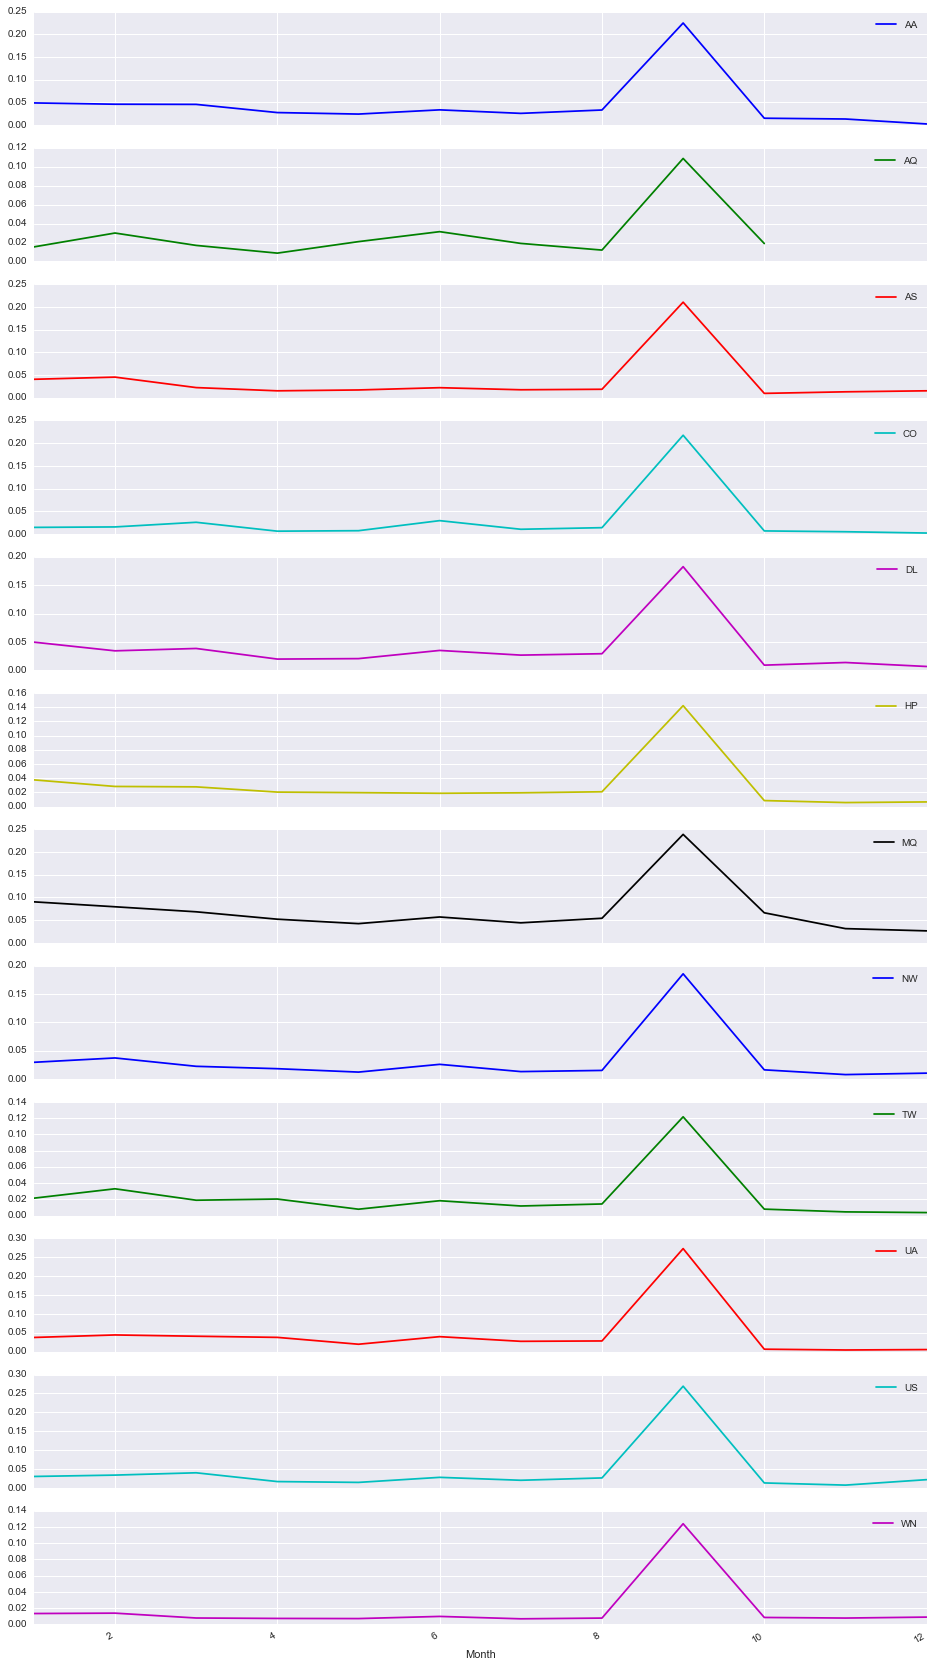

In [8]:
# Let's take a look at cancellations by carrier and month.
df_2001_by_carrier = df_2001.groupby(by=['UniqueCarrier', 'Month'])
proportional_cancellations = df_2001_by_carrier['Cancelled'].sum() / df_2001_by_carrier.size()
proportional_cancellations.unstack(0).plot(subplots=True, figsize=(16, 32))

There is a distinct peak for proportional cnacellations Sepetember 2001. This isn't a huge surprise, but the resolution by month ffels too low.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x113962710>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x10f060ad0>], dtype=object)

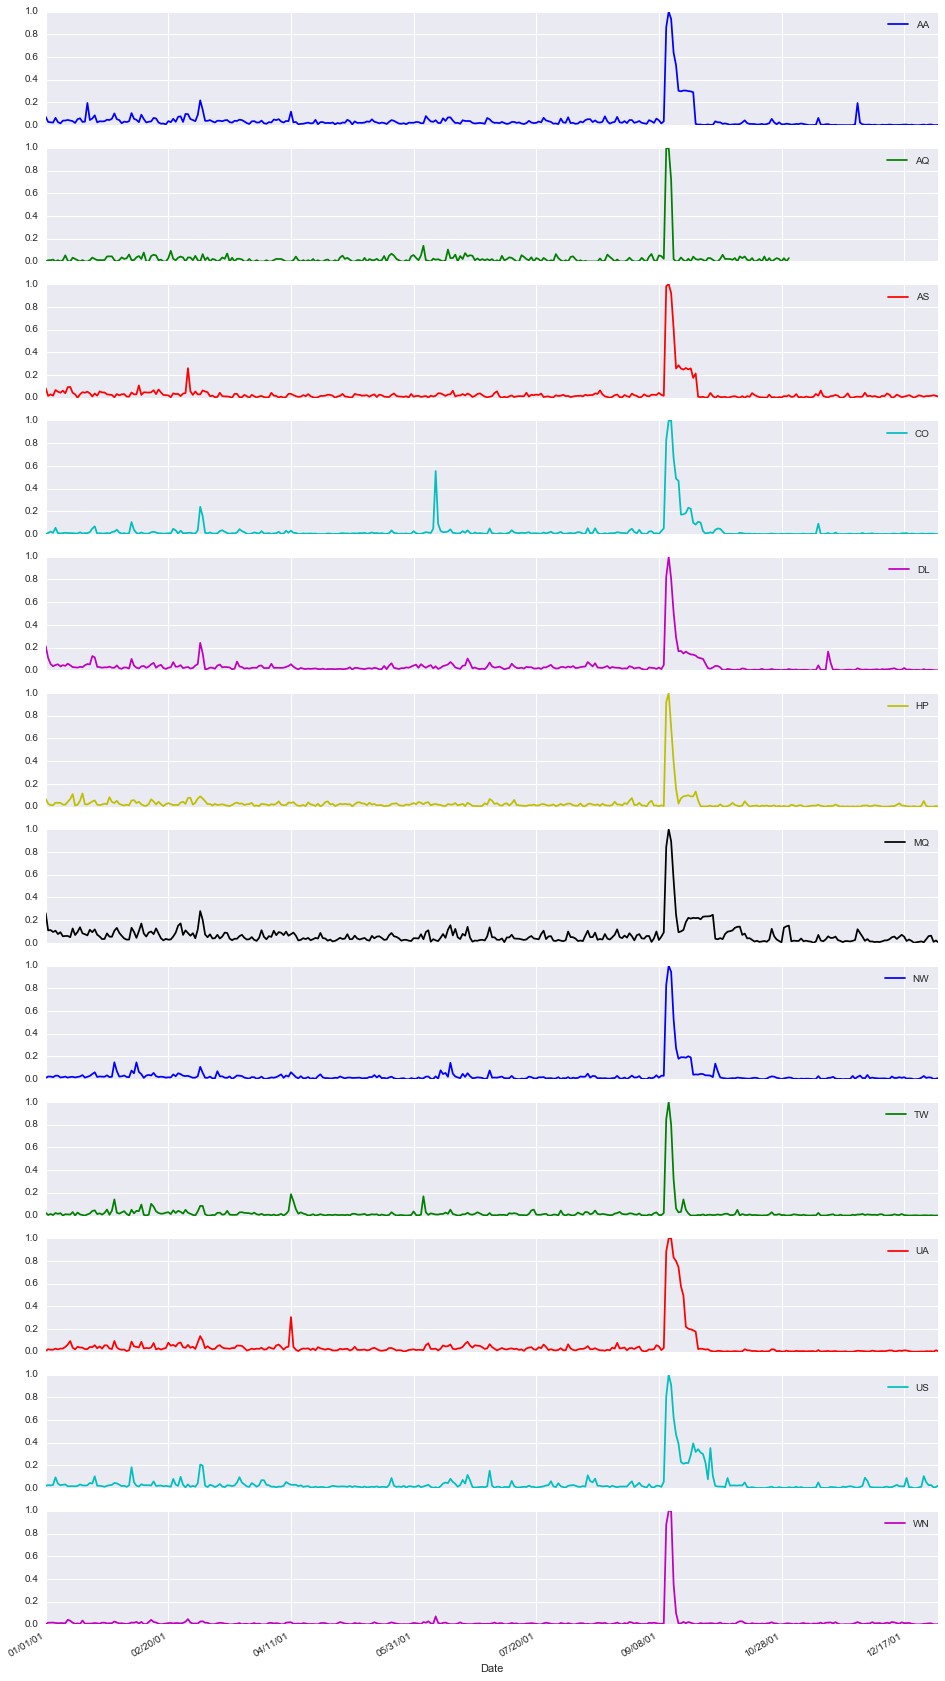

In [9]:
# Let's add a DayofYear column and regroup the data by carrier and day of the year to increase 
# the resolution of the proportional cancellations plots.

import datetime
d = df_2001

def date(year, month, day_of_month):
    return datetime.datetime(year, month, day_of_month).strftime('%m/%d/%y')

d['Date'] = np.vectorize(date)(d.Year, d.Month, d.DayofMonth)
df_2001_by_carrier = d.groupby(by=['UniqueCarrier', 'Date'])
proportional_cancellations = df_2001_by_carrier['Cancelled'].sum() / df_2001_by_carrier.size()
proportional_cancellations.unstack(0).plot(subplots=True, figsize=(16, 32))

This is much more interesting! The two letter airline designations aren't very meaningful though.

In [10]:
# Let's import the carriers data and take a look.
carriers = pd.read_csv('./data/carriers.csv')
carriers.head()

,Code,Description
0,02Q,Titan Airways
1,04Q,Tradewind Aviation
2,05Q,"Comlux Aviation, AG"
3,06Q,Master Top Linhas Aereas Ltd.
4,07Q,Flair Airlines Ltd.


In [11]:
# What are the descriptions for 'US' and 'HP'?
carriers[carriers.Code.isin(['US', 'HP'])]

,Code,Description
642,HP,America West Airlines Inc. (Merged with US Air...
1308,US,US Airways Inc. (Merged with America West 9/05...


In [12]:
# We don't want such a long names in our data so let's trim that value.
def remove_parenthetical_description(description):
    return description.split(' (')[0]
carriers.Description = carriers.Description.map(remove_parenthetical_description)
carriers[carriers.Code.isin(['US', 'HP'])]

,Code,Description
642,HP,America West Airlines Inc.
1308,US,US Airways Inc.


In [13]:
# Let's add a new column to the data that represents the airline's name.
d = df_2001
carriers = carriers.rename(columns={'Code': 'UniqueCarrier'})
d = d.join(carriers.set_index('UniqueCarrier'), how='left', on='UniqueCarrier')
d = d.rename(columns={'Description': 'CarrierName'})
d.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Date,CarrierName
0,2001,1,17,3,1806,1810,1931,1934,US,375,...,0,NaN,0,NaN,NaN,NaN,NaN,NaN,01/17/01,US Airways Inc.
1,2001,1,18,4,1805,1810,1938,1934,US,375,...,0,NaN,0,NaN,NaN,NaN,NaN,NaN,01/18/01,US Airways Inc.
2,2001,1,19,5,1821,1810,1957,1934,US,375,...,0,NaN,0,NaN,NaN,NaN,NaN,NaN,01/19/01,US Airways Inc.
3,2001,1,20,6,1807,1810,1944,1934,US,375,...,0,NaN,0,NaN,NaN,NaN,NaN,NaN,01/20/01,US Airways Inc.
4,2001,1,21,7,1810,1810,1954,1934,US,375,...,0,NaN,0,NaN,NaN,NaN,NaN,NaN,01/21/01,US Airways Inc.


In [14]:
# Let's prepare the grouped data to be exported to a new CSV.
df_2001_by_carrier = d.groupby(by=['CarrierName', 'Date'])
def add_proportional_cancellations(x):
    x['ProportionalCancellations'] = x['Cancelled'].sum() / float(x['Cancelled'].count())
    return x
df_2001_by_carrier_with_cancellations = df_2001_by_carrier.apply(add_proportional_cancellations)

In [15]:
# Let's export this data so we can create a nice visualisation in D3.
columns_to_export = ['CarrierName','Date','ProportionalCancellations']
data_to_export = df_2001_by_carrier_with_cancellations[columns_to_export].drop_duplicates()
data_to_export.to_csv('./data/2001_proportional_cancellations.csv', header=True, index=False)

In [16]:
# The data visualisation feedback was to add another dimension or two to the data and animate a buble chart 
# in memory of Hans Rosling who died yesterday.

# Let's also take a look at departure delays porportional to the time spent in the air. 
# A value of 1 for this metric means that on that day for that airline, a plane was 
# delayed for 1 minute for every minute a plane was in the air.
df_2001_by_carrier = d.groupby(by=['CarrierName', 'Date'])
def add_extra_columns(x):
    x['ProportionalCancellations'] = x['Cancelled'].sum() / float(x['Cancelled'].count())
    if x['AirTime'].sum() == 0:
        x['ProportionalDelays'] = 0
    else:
        x['ProportionalDelays'] = x['DepDelay'].sum() / float(x['AirTime'].sum())
    x['NumFlights'] = x['Cancelled'].count()
    return x
df_2001_by_carrier_with_extra_columns = df_2001_by_carrier.apply(add_extra_columns)

In [17]:
# Let's export this data so we can create a nice visualisation in D3.
columns_to_export = ['CarrierName','Date','NumFlights','ProportionalCancellations','ProportionalDelays']
data_to_export = df_2001_by_carrier_with_extra_columns[columns_to_export].drop_duplicates()
data_to_export.to_csv('./data/2001_proportional_cancellations_delays_and_flights.csv', header=True, index=False)

In [18]:
# The Udacity reviewer suggested pre-processing the data to filter only the data needed for the visualisation to
# decrease the time it takes the visualisation to load in the browser.
columns_to_export = ['CarrierName','Date','ProportionalCancellations']
unfiltered_data = df_2001_by_carrier_with_cancellations[columns_to_export].drop_duplicates()
unfiltered_data = unfiltered_data.reset_index(drop=True).reindex()

In [19]:

def in_date_range(x):
    july_first = datetime.datetime(2001, 7, 1)
    jan_first = datetime.datetime(2002, 1, 1)
    day = datetime.datetime.strptime(x.Date, '%m/%d/%y')
    return july_first <= day < jan_first
    
def in_carrier_list(x):
    carriers = [
        "American Airlines Inc.",
        "United Air Lines Inc.",
        "Delta Air Lines Inc.",
        "Continental Air Lines Inc.",
        "US Airways Inc.",
        "American Eagle Airlines Inc."
    ]
    return x['CarrierName'].is_in(carriers)

def data_filter(x):
    return in_date_range(x) and in_carrier_list(x)
    
filtered_data = unfiltered_data.apply(data_filter, axis=1)

AttributeError: ("'str' object has no attribute 'is_in'", u'occurred at index 2172')

In [ ]:
# Let's export this data so we can create a nice visualisation in D3.
columns_to_export = ['CarrierName','Date','ProportionalCancellations']
data_to_export = filtered_data[columns_to_export].drop_duplicates()
data_to_export.to_csv('./data/2001_proportional_cancellations_prefiltered.csv', header=True, index=False)